# Compute the state matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qibo.gates import M, X
from qibo.models import Circuit

from qiboconnection.api import API
from qiboconnection.connection import ConnectionConfiguration

api = API(ConnectionConfiguration(username="qat", api_key="meow"))
api.select_device_id(9)

We first generate and queue the circuits we need to execute:

In [2]:
def prepare_eigenstate(eigenstate) -> Circuit:
    """Prepares the given eigenstate (from 0 to 32) as a Qibo circuit.

    Args:
        number (int): Eigenstate between 0 and 32.

    Returns:
        Circuit: Qibo circuit measuring the given eigenstate.
    """
    binary_string = bin(eigenstate)[2:].zfill(5)  # Convert and pad with leading zeros
    circuit = Circuit(5)
    for index, bit in enumerate(binary_string):
        if bit == "1":
            circuit.add(X(index))
    for index in range(5):
        circuit.add(M(index))
    return circuit

In [3]:
states = np.arange(32)
circuits = [prepare_eigenstate(state) for state in np.arange(32)]

result_id = api.execute(circuits, nshots=1000)[0]

print(f"The id of the executed job is: {result_id}")

The id of the executed job is: 5735


Once the jobs have been executed, we can use the cell below to plot the state matrix:

In [6]:
results = api.get_result(result_id)

Your job with id 5735 is completed.


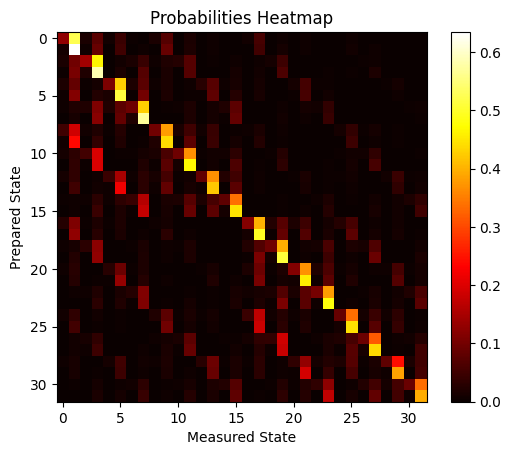

In [7]:
prob_matrix = np.zeros((32, 32))
for result, state in zip(results, states):
    for key, value in result["probabilities"].items():
        prob_matrix[state, int(key, 2)] = value


plt.imshow(prob_matrix, cmap="hot")
plt.xlabel("Measured State")
plt.ylabel("Prepared State")
plt.colorbar()
plt.title("Probabilities Heatmap")
plt.show()